In [1]:
import os

filename = os.path.join('data', 'nycflights', '*.csv')
filename

'data/nycflights/*.csv'

In [27]:
import dask
import dask.dataframe as dd

df = dd.read_csv(filename, parse_dates={'Date': [0, 1, 2]})

In [3]:
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [6]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N539UA'",)

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [28]:
df = dd.read_csv(filename,
                parse_dates={'Date': [0, 1, 2]},
                dtype={'TailNum': str,
                      'CRSElapsedTime': float,
                      'Cancelled': bool})

In [8]:
df.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [12]:
import pandas as pd
import glob

In [17]:
csvs = glob.glob('data/nycflights/*.csv')

In [21]:
df_list = []
for csv in csvs:
    temp_df = pd.read_csv(csv)
    df_list.append(temp_df)
pdf = pd.concat(df_list)
pdf.shape

(2611892, 23)

In [24]:
%time pdf.DepDelay.max()

CPU times: user 11.7 ms, sys: 5.65 ms, total: 17.4 ms
Wall time: 16.1 ms


1435.0

In [29]:
%time df.DepDelay.max().compute()

CPU times: user 9.89 s, sys: 1.4 s, total: 11.3 s
Wall time: 6.39 s


1435.0

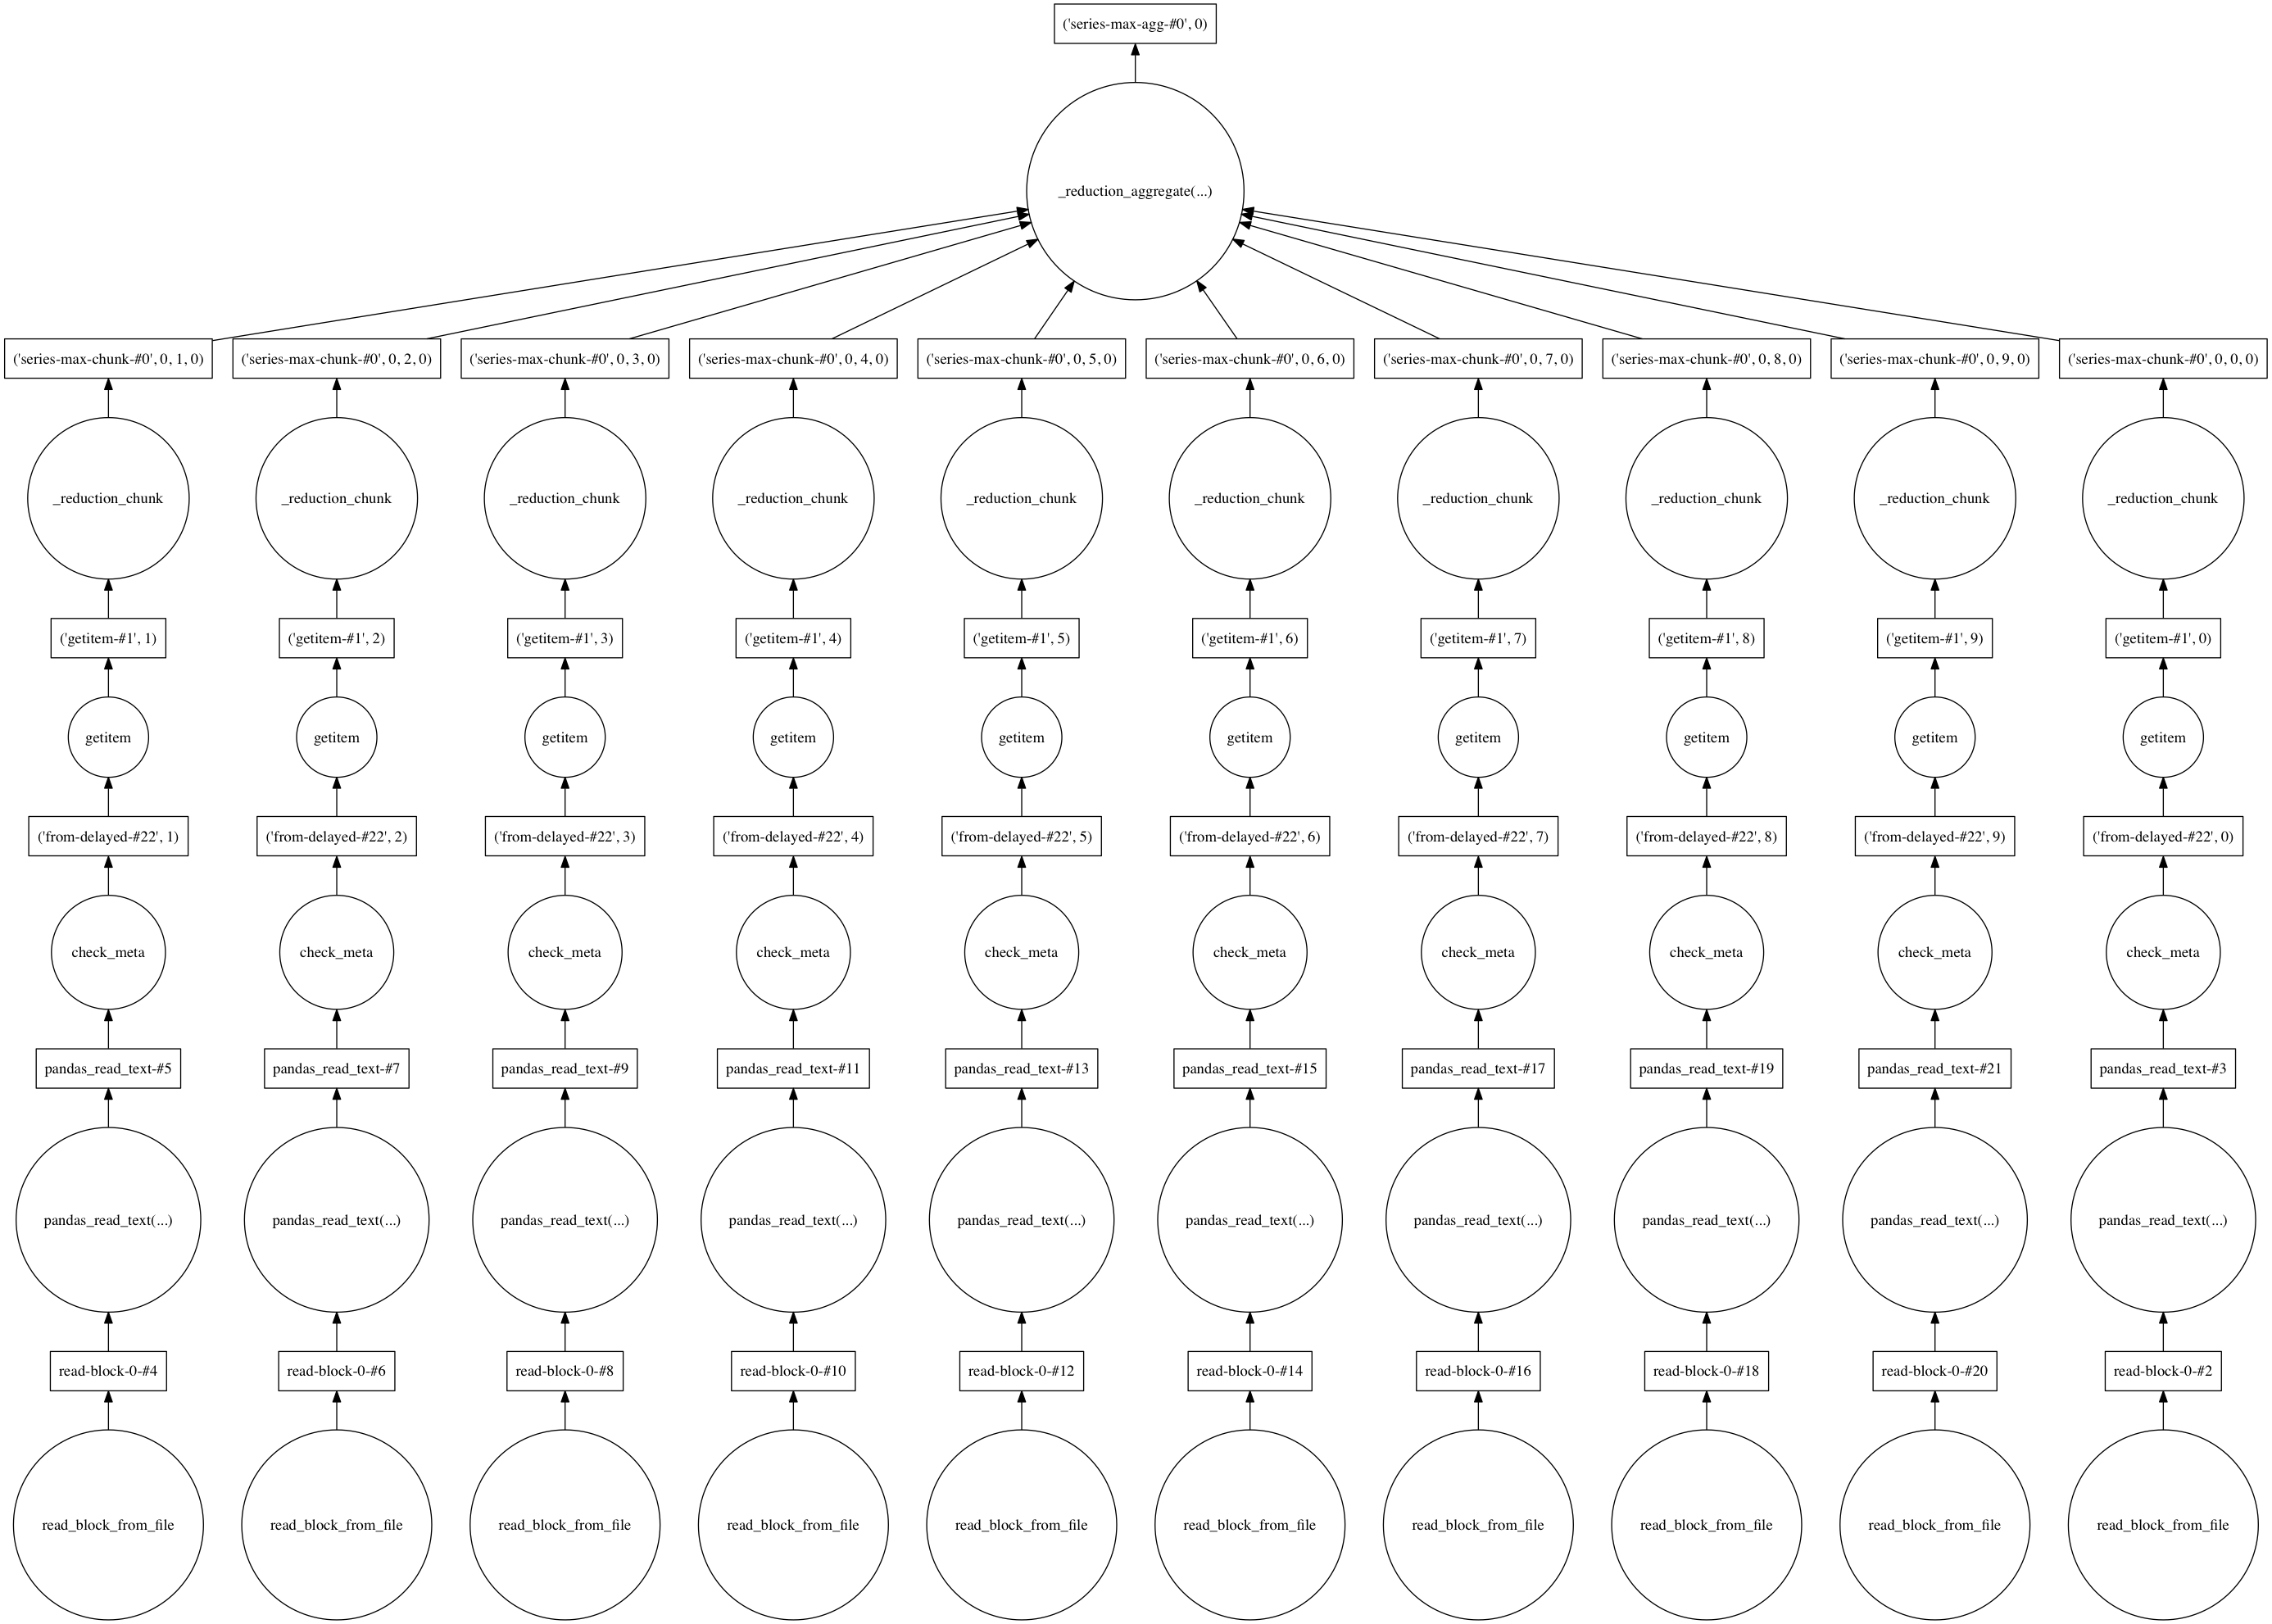

In [30]:
df.DepDelay.max().visualize()

In [32]:
df[df.DepDelay < 10].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0
5,1990-01-06,6,1539.0,1540,1653.0,1701,US,33,NaN,74.0,...,NaN,-8.0,-1.0,EWR,PIT,319.0,NaN,NaN,False,0
7,1990-01-08,1,1543.0,1540,1656.0,1701,US,33,NaN,73.0,...,NaN,-5.0,3.0,EWR,PIT,319.0,NaN,NaN,False,0
8,1990-01-09,2,1540.0,1540,1704.0,1701,US,33,NaN,84.0,...,NaN,3.0,0.0,EWR,PIT,319.0,NaN,NaN,False,0
10,1990-01-11,4,1544.0,1540,1726.0,1701,US,33,NaN,102.0,...,NaN,25.0,4.0,EWR,PIT,319.0,NaN,NaN,False,0
12,1990-01-13,6,1542.0,1540,1703.0,1701,US,33,NaN,81.0,...,NaN,2.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
13,1990-01-14,7,1539.0,1540,1701.0,1701,US,33,NaN,82.0,...,NaN,0.0,-1.0,EWR,PIT,319.0,NaN,NaN,False,0


In [33]:
df = dd.read_csv(filename,
                dtype={'TailNum': str,
                      'CRSElapsedTime': float,
                      'Cancelled': bool})
df.divisions

(None, None, None, None, None, None, None, None, None, None, None)

In [34]:
df2 = df.set_index('Year')
df2.divisions

(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 1999)

In [39]:
df.groupby(df.Year).Cancelled.sum().compute()

Year
1990     3894.0
1991     3326.0
1992     5182.0
1993     6191.0
1994     8418.0
1995     6384.0
1996    10440.0
1997     6420.0
1998     8333.0
1999    12343.0
Name: Cancelled, dtype: float64

In [40]:
df.groupby(df.Origin).Cancelled.sum().compute()

Origin
EWR    34680.0
JFK     7098.0
LGA    29153.0
Name: Cancelled, dtype: float64

In [42]:
df.groupby(df.Origin).DepDelay.mean().compute()

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [43]:
df.groupby(df.DayOfWeek).DepDelay.mean().compute()

DayOfWeek
1     8.096565
2     8.149109
3     9.141912
4    10.538275
5    11.476687
6     7.824071
7     8.994296
Name: DepDelay, dtype: float64